In [3]:
# Data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Model development
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Model evaluation
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    classification_report, 
    confusion_matrix
)

# For displaying results nicely in the notebook
from IPython.display import display, HTML

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# For reproducibility
import random
random.seed(42)
np.random.seed(42)

In [4]:
# Read the student performance dataset
df = pd.read_csv('student_performance_data.csv')

# Remove StudentID column from the dataset, irrelevant for what I am finding
df = df.drop(columns=['StudentID'])

# Basic info about the dataset
print("Dataset shape:", df.shape)
print("\nFirst 5 rows of the dataset:")
display(df.head())

# Descriptive statistics
print("\nDescriptive statistics:")
display(df.describe())

# Check for missing values
print("\nMissing values per column:")
display(df.isnull().sum())

# Display information about data types and non-null counts
print("\nDataset information:")
display(df.info())

Dataset shape: (500, 8)

First 5 rows of the dataset:


,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
0,Male,24,37,90.75,3.47,Arts,Yes,No
1,Female,22,37,74.90,2.32,Education,No,No
2,Male,22,10,53.36,2.38,Business,No,No
3,Male,24,10,70.26,3.46,Science,Yes,No
4,Male,18,19,74.87,2.31,Education,Yes,No



Descriptive statistics:


,Age,StudyHoursPerWeek,AttendanceRate,GPA
count,500.000000,500.000000,500.000000,500.00000
mean,20.956000,19.876000,74.990380,2.98516
std,2.000517,11.471347,14.565917,0.56362
min,18.000000,1.000000,50.010000,2.00000
25%,19.000000,10.000000,62.607500,2.48750
50%,21.000000,20.500000,75.730000,3.00000
75%,23.000000,30.000000,87.220000,3.48000
max,24.000000,39.000000,99.970000,3.99000



Missing values per column:


Gender                       0
Age                          0
StudyHoursPerWeek            0
AttendanceRate               0
GPA                          0
Major                        0
PartTimeJob                  0
ExtraCurricularActivities    0
dtype: int64


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     500 non-null    object 
 1   Age                        500 non-null    int64  
 2   StudyHoursPerWeek          500 non-null    int64  
 3   AttendanceRate             500 non-null    float64
 4   GPA                        500 non-null    float64
 5   Major                      500 non-null    object 
 6   PartTimeJob                500 non-null    object 
 7   ExtraCurricularActivities  500 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 31.4+ KB


None

Target distribution:
target
0    300
1    200
Name: count, dtype: int64
Percentage of students with GPA ≥ 3.2: 40.00%

--------------------------------------------------
Training and evaluating Logistic Regression...

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.60      0.88      0.72        60
           1       0.42      0.12      0.19        40

    accuracy                           0.58       100
   macro avg       0.51      0.50      0.45       100
weighted avg       0.53      0.58      0.51       100



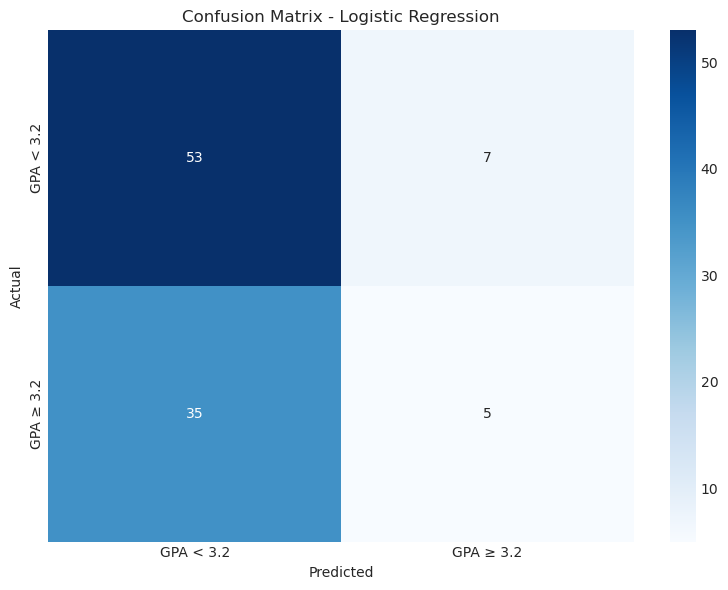


--------------------------------------------------
Training and evaluating k-Nearest Neighbors...

Classification Report for k-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.57      0.70      0.63        60
           1       0.31      0.20      0.24        40

    accuracy                           0.50       100
   macro avg       0.44      0.45      0.43       100
weighted avg       0.46      0.50      0.47       100



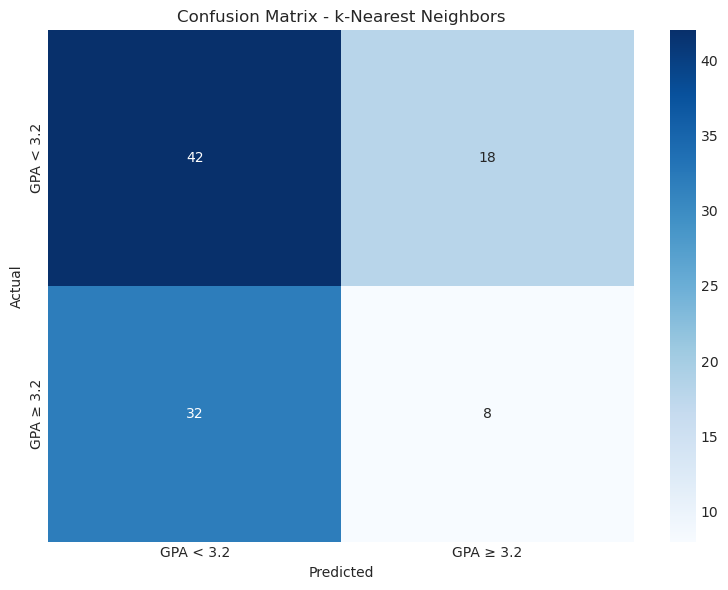


--------------------------------------------------
Training and evaluating Decision Tree...

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.58      0.52      0.55        60
           1       0.38      0.45      0.41        40

    accuracy                           0.49       100
   macro avg       0.48      0.48      0.48       100
weighted avg       0.50      0.49      0.49       100



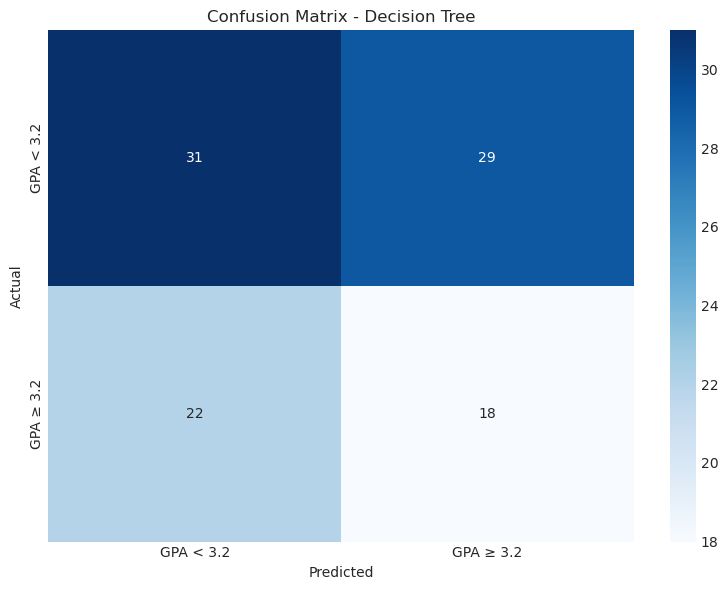


Model Comparison:


,Model,Accuracy
0,Logistic Regression,0.58
1,k-Nearest Neighbors,0.50
2,Decision Tree,0.49


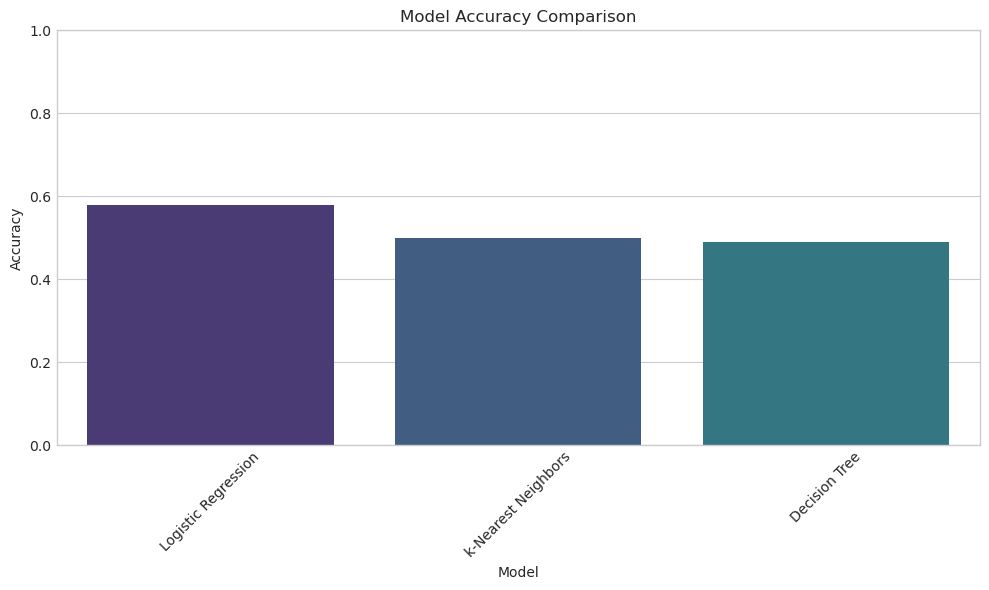

In [5]:
# Step 1: Create binary target based on GPA
gpa_column = 'GPA' 
df['target'] = (df[gpa_column] >= 3.2).astype(int)

# Display the distribution of the target variable
print("Target distribution:")
print(df['target'].value_counts())
print(f"Percentage of students with GPA ≥ 3.2: {df['target'].mean()*100:.2f}%")

# Step 2: Prepare the data
# Exclude GPA and target from features
X = df.drop(columns=[gpa_column, 'target'])
y = df['target']

# Handle categorical features
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Build the models
# Logistic Regression
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# k-NN
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

# Decision Tree
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Dictionary of models
models = {
    'Logistic Regression': log_reg_pipeline,
    'k-Nearest Neighbors': knn_pipeline,
    'Decision Tree': dt_pipeline
}

# Step 5: Train and evaluate each model
results = {}

for name, model in models.items():
    print(f"\n{'-'*50}")
    print(f"Training and evaluating {name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'accuracy': accuracy,
        'predictions': y_pred
    }
    
    # Print classification report
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred))

# Create and display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['GPA < 3.2', 'GPA ≥ 3.2'],
                yticklabels=['GPA < 3.2', 'GPA ≥ 3.2'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.tight_layout()
    plt.show()

# Step 6: Compare model performance
model_comparison = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[model]['accuracy'] for model in results]
})

# Sort by accuracy
model_comparison = model_comparison.sort_values('Accuracy', ascending=False).reset_index(drop=True)

# Display comparison
print("\nModel Comparison:")
display(model_comparison)

# Visualize model comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=model_comparison)
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()